In [1]:
import os
os.chdir("../")
os.getcwd()

'/home/Aishu/dl-model-extraction'

In [2]:
from attacker.query import *
from attacker.utils import *
from victim.__init__ import *

set_seed(42)

# Query victim model & Train attacker model

In [3]:
config = {
    "batch_size": 500,
    "learning_rate": 0.008,
    "epochs": 80,
    "query_size":10000,
    "query_type": 'coreset',
    "victim": { "data": CIFAR_10,  "model_name": RESNET50 },
    "attacker": RESNET34
}

Files already downloaded and verified
Files already downloaded and verified
Loading queried cifar_10 dataset with resnet50 victim
    - input:10000 queried:10000
Sample using None with query size 10000
    - input:10000 sampled:10000
Loading queried cifar_10 dataset with resnet50 victim
    - input:50000 queried:50000
Sample using coreset with query size 10000
    - input:50000 sampled:10000
epoch 1
    - train_acc 0.13590 train_loss 2.34062
    - test_acc  0.08050 test_loss  24048.40234
epoch 2
    - train_acc 0.20600 train_loss 2.15605
    - test_acc  0.15190 test_loss  12.49810
epoch 3
    - train_acc 0.24100 train_loss 2.02249
    - test_acc  0.17270 test_loss  2.52995
epoch 4
    - train_acc 0.29210 train_loss 2.03531
    - test_acc  0.29100 test_loss  2.77154
epoch 5
    - train_acc 0.33440 train_loss 1.67510
    - test_acc  0.34470 test_loss  1.71550
epoch 6
    - train_acc 0.30170 train_loss 1.99919
    - test_acc  0.27740 test_loss  9.17443
epoch 7
    - train_acc 0.33630 trai

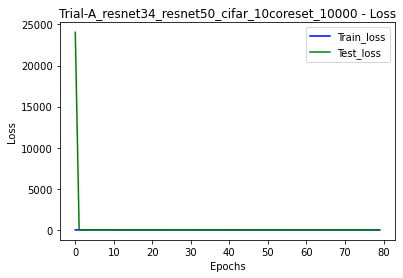

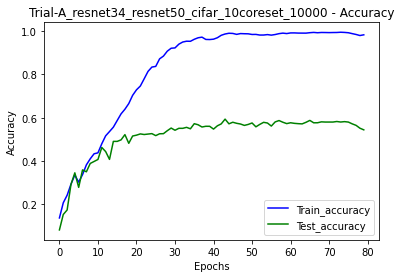

{'Victim': 'resnet50', 'Dataset': 'cifar_10', 'QueryType': 'coreset', 'QuerySize': 10000, 'Queried Output': 'Labels', 'Attacker': 'resnet34', 'Train Loss': 0.0389, 'Train Accuracy': 98.34, 'Test Loss': 2.9452, 'Test Accuracy': 54.36}


In [4]:
# get dataset in dataloader
trainloader, testloader, outputs = get_dataloader(config["victim"]["data"])

# query & save test data
querytestloader = query_victim(config["victim"], outputs, testloader, len(testloader.dataset), train=False)

# query train data
querytrainloader = query_victim(config["victim"], outputs, trainloader, config["query_size"], q_type=config["query_type"])

# initialize attacker model
attacker = get_model(config["attacker"], outputs)

# train attacker model
attacker_result = training(attacker, querytrainloader, querytestloader, config["epochs"],
                           optimizer=torch.optim.Adam(attacker.parameters(), lr=config["learning_rate"]),
                           loss=torch.nn.CrossEntropyLoss())

# save & visualize model inference
title = f'Trial-A_{config["attacker"]}_{config["victim"]["model_name"]}_{config["victim"]["data"]}{config["query_type"]}_{config["query_size"]}'
percent = save_visualize(attacker, attacker_result,title )
results_dict={"Victim":config["victim"]["model_name"],
                "Dataset":config["victim"]["data"],
                "QueryType": config["query_type"],
                "QuerySize": config["query_size"],
                "Queried Output": 'Labels',
                "Attacker": config["attacker"],
                "Train Loss": percent[0],
                "Train Accuracy": percent[1],
                "Test Loss": percent[2],
                "Test Accuracy": percent[3]}
print(results_dict)

# Parameters

In [ ]:
parameters = {
        "query_size": [10000, 20000, 30000, 40000, 50000],
        "query_type": ['coreset','random'],
        "victim":[{ "data": CIFAR_10, "model_name": RESNET50},
                  {"data": CIFAR_100, "model_name": RESNET50 }],
        "attacker":[RESNET34]
}

# Investigations

In [ ]:
Results = []
# Iterate through Victim Model & Dataset
for victim in parameters["victim"]:
    print('---------------------------------------------------------------------------')
    # get dataset in dataloader
    trainloader, testloader, outputs = getDataset(victim["data"])

    # query test data
    querytestloader = QueryVictim(victim, outputs, testloader, len(testloader.dataset), train=False)

    # Iterate through Attacker Model
    for attacker_type in parameters["attacker"]:
        # Iterate Through Query Type
        for querytype in parameters["query_type"]:
            # Iterate Through Query Size
            for size in parameters["query_size"]:
                print('-----------------------------------------------------------------------------')
                print(f'-----------------------Dataset: {victim["data"]}----------------------------')
                print(f'--------Victim: {victim["model_name"]} Attacker: {attacker_type}------------')
                print(f'---------------Query Type: {querytype} Query Size: {size}-------------------')

                # query train data
                querytrainloader = query_victim(victim, outputs, trainloader, size, q_type=querytype)

                # initialize attacker model
                attacker = get_model(attacker_type, outputs)

                # train attacker model
                attacker_result = training(attacker, querytrainloader, querytestloader, (-1, 3, 32, 32), config["epochs"],
                                           optimizer=torch.optim.Adam(attacker.parameters(), lr=config["learning_rate"]),
                                           loss=torch.nn.CrossEntropyLoss())

                # save & visualize model inference
                title = f'A_{attacker_type}_{victim["model_name"]}_{victim["data"]}_{querytype}_{size}'
                percent = SaveVisualize(attacker, attacker_result, title)
                results_dict={"Victim":victim["model_name"],
                                "Dataset":victim["data"],
                                "QueryType": querytype,
                                "QuerySize": size,
                                "Queried Output": 'Labels',
                                "Attacker": attacker_type,
                                "Train Loss": percent[0],
                                "Train Accuracy": percent[1],
                                "Test Loss": percent[2],
                                "Test Accuracy": percent[3]}

                print(results_dict)
                Results.append(results_dict)
                print('-----------------------------------------------------------------------------')

In [ ]:
Results